In [93]:
import torch
import clip
import numpy as np
from PIL import Image
import pandas as pd
import requests
from io import BytesIO

device = "cuda" if torch.cuda.is_available() else "cpu"
print( device )

cuda


In [4]:
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 354M/354M [07:56<00:00, 742kiB/s]


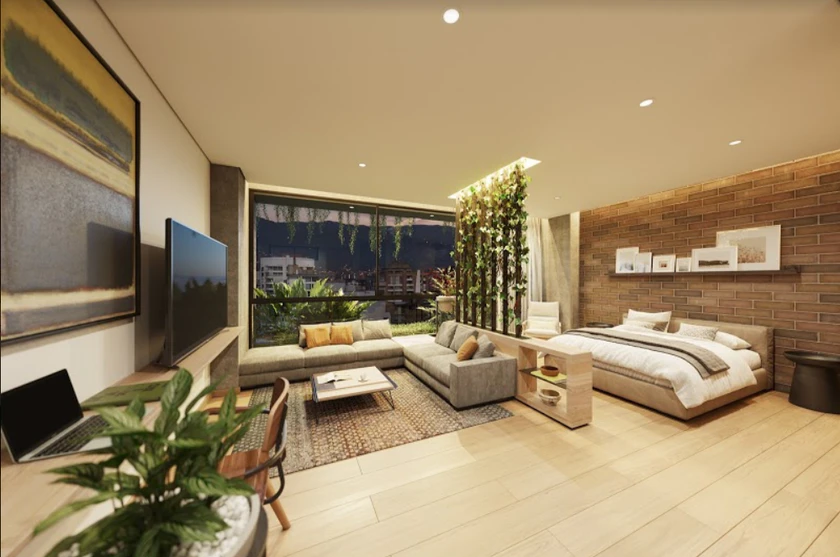

In [7]:
img_path = '/home/teo/_data/screenshot-drive.google.com-2021.01.05-11_26_12.webp'
Image.open(img_path)

In [36]:
preprocess(Image.open(img_path)).unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [32]:
img_tensor = preprocess(Image.open(img_path))

img_np = np.uint8(img_tensor.permute(1,2,0).numpy() * 255)
print(img_np.shape)

(224, 224, 3)


In [57]:
# img_np

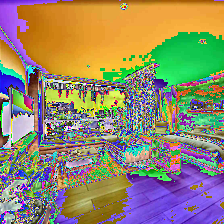

In [34]:
Image.fromarray(img_np)

In [188]:
def img_from_url(img_url: str) -> Image:
    response = requests.get(img_url) 
    content = response.content
    print( response.status_code, len(content))
    file = BytesIO( content )
    file.seek(0)
    
    return Image.open(file)


In [186]:
# img_url='https://lahaus.imgix.net/uploads/real_estate_attachment/picture/1880882/santa_rita_real_apartamento_en_venta_en_simon_bolivar_de_3_alcoba_cover_989699ee9dd8d24ee3a4.php'
# img_url = 'https://lahaus.imgix.net/uploads/real_estate_attachment/picture/1328546/apartamento_en_venta_en_la_floresta_92m_gallery_2efe20d6f0d9ac628dd4.php'
# img_url = "https://www.internationalmodelnetwork.com/hu/includes/images/categories/female-model.jpg"
img_url1 = "https://cocainemodels.com/wp-content/uploads/2018/12/model-agentur-anschreiben-auftreten-bewerbung-1030x472.jpg"
img_url2 = "https://image.shutterstock.com/image-photo/old-woman-deep-wrinkles-must-600w-62326069.jpg"



In [166]:
del image

In [ ]:
image1 = img_from_url(img_url1).crop((400, 0, 600, 250))
image2 = img_from_url(img_url2).crop((0,0, 400, 480))

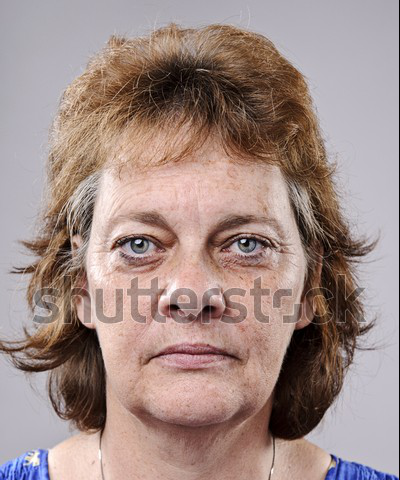

In [211]:
image2

In [197]:
images_tensor = preprocess(image1).unsqueeze(0).to(device)


In [198]:
del image_tensor

In [199]:
images_tensor = torch.stack( [preprocess(image1), preprocess(image2)] )

In [200]:
images_tensor.shape

torch.Size([2, 3, 224, 224])

In [132]:
clip.tokenize(texts).shape

torch.Size([11, 77])

In [138]:
import time
pd.set_option('display.max_colwidth', 100)

In [219]:
texts = ["a view of a city", "a view of the mountains", "natural light", "artificial light",
         "led lights", "a bedroom", "a tv room", "a bedroom and tv room", 
         "a tv room and bedroom",  "a tv room and bedroom with exterior view",
         "a tv room and bedroom with a view of the mountains",
         "a kitchen", "a render of a tv room and bedroom", 
         "a photo of a tv room and bedroom", "hard floor",
         "a dark window", "wood furniture", "wooden furniture", "bedroom living room separation", 
         "a dog", "a person", "a watermark", "a watermark in the bottom left corner", "a living room"]

texts = ["a living room", "a dining room", "a dining table", "a bedroom",
         "courtains", "exterior view", "view of nature", "trees", "furniture", "a kitchen", "a bathroom", 
         "ceramic floors", "wooden floors", "hard floors", "granite floors", 
         "a living room and dining table with a natural light and lots of green",
         "a furnished living room and dining table with a natural light and lots of green",
         "a furnished living room and dining table with natural light and lots of green"]

texts = ['a pretty woman', 'an uggly woman', 'a horrible woman', 'a disgusting woman', 'a pretty face', 
         'small breasts', 'big breasts',
         'a pretty girl', 'a handsome man', 'a well-dressed woman', 'a beautiful woman',
         'a model', 'a ten', 'a gorgeous woman', 'a blonde woman', 'a brunette', 'a red-headed woman',
         'a redheaded woman', 'a redhead', 'shutterstock']

t0 = time.perf_counter()

# text = clip.tokenize(texts).to(device)

with torch.no_grad():
    # image_features = model.encode_image(images_tensor)
    text_features = model.encode_text(text)
    
    # logits_per_image, logits_per_text = model(images_tensor, text)
    # probs = logits_per_image.softmax(dim=-1).cpu().numpy()

t1 = time.perf_counter()

print( f'elapsed: {t1 - t0}')
logits = logits_per_image.cpu().numpy()
probs1 = 1 / ( 1.0 + np.exp( - (logits - 20.5)/5.0 ))
# pd.DataFrame({"phrases": texts, "logits": logits[0], "probs1": probs1[0]}).sort_values('logits', ascending=False)

df = pd.DataFrame(probs1.transpose())
df['phrases'] = texts
df
#for phrase, logit in zip(texts, probs[0]):
#    print(f"{phrase:20s} {logit:.6f}")
    
#print("Label probs:", logits_per_image.cpu().numpy())  # prints: [[0.9927937  0.00421068 0.00299572]]

elapsed: 0.2511611499940045


,0,1,phrases
0,0.625000,0.672363,a pretty woman
1,0.590332,0.807129,an uggly woman
2,0.514648,0.784668,a horrible woman
3,0.511719,0.768066,a disgusting woman
4,0.540527,0.684570,a pretty face
5,0.498535,0.548828,small breasts
6,0.493164,0.541992,big breasts
7,0.464600,0.594727,a pretty girl
8,0.256348,0.532715,a handsome man
9,0.489014,0.668457,a well-dressed woman


In [210]:
text_features.shape

torch.Size([19, 512])

In [204]:
logits.shape

(2, 19)

In [141]:
image_features.shape

torch.Size([1, 512])